## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [193]:
df1 = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [194]:
df1.head(10)

,gender,race_ethnicity,parental_level,lunch,test_preparation,math_score,reading_score,writing_score
0,Male,Group A,Bachelor's Degree,Standard,Completed,78,85,82
1,Female,Group B,Some College,Free/Reduced,None,62,72,70
2,Male,Group C,Master's Degree,Standard,None,90,88,85
3,Female,Group D,Associate Degree,Free/Reduced,Completed,68,75,74
4,Male,Group A,High School,Standard,None,72,80,77
5,Female,Group B,Bachelor's Degree,Free/Reduced,Completed,85,92,89
6,Male,Group C,Some College,Standard,None,78,83,80
7,Female,Group D,Master's Degree,Free/Reduced,Completed,95,98,96
8,Male,Group A,High School,Standard,None,60,65,63
9,Female,Group B,Associate Degree,Free/Reduced,Completed,75,78,76


#### Shape of the dataset

In [195]:
df1.shape

(443, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [196]:
df1.isna().sum()

gender              0
race_ethnicity      0
parental_level      0
lunch               0
test_preparation    0
math_score          0
reading_score       0
writing_score       0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [197]:
df1.duplicated().sum()

364

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [198]:
# Check Null and Dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            443 non-null    object
 1   race_ethnicity    443 non-null    object
 2   parental_level    443 non-null    object
 3   lunch             443 non-null    object
 4   test_preparation  443 non-null    object
 5   math_score        443 non-null    int64 
 6   reading_score     443 non-null    int64 
 7   writing_score     443 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 27.8+ KB


### 3.4 Checking the number of unique values of each column

In [199]:
df1.nunique()

gender               2
race_ethnicity       4
parental_level       5
lunch                2
test_preparation     2
math_score          17
reading_score       20
writing_score       26
dtype: int64

### 3.5 Check statistics of data set

In [200]:
df1.describe()

,math_score,reading_score,writing_score
count,443.000000,443.000000,443.000000
mean,78.790068,81.950339,79.781038
std,10.207073,10.248155,10.316678
min,45.000000,52.000000,48.000000
25%,72.000000,75.000000,74.000000
50%,78.000000,82.000000,80.000000
75%,88.000000,90.000000,87.000000
max,98.000000,98.000000,97.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [201]:
df1.head(20)

,gender,race_ethnicity,parental_level,lunch,test_preparation,math_score,reading_score,writing_score
0,Male,Group A,Bachelor's Degree,Standard,Completed,78,85,82
1,Female,Group B,Some College,Free/Reduced,None,62,72,70
2,Male,Group C,Master's Degree,Standard,None,90,88,85
3,Female,Group D,Associate Degree,Free/Reduced,Completed,68,75,74
4,Male,Group A,High School,Standard,None,72,80,77
5,Female,Group B,Bachelor's Degree,Free/Reduced,Completed,85,92,89
6,Male,Group C,Some College,Standard,None,78,83,80
7,Female,Group D,Master's Degree,Free/Reduced,Completed,95,98,96
8,Male,Group A,High School,Standard,None,60,65,63
9,Female,Group B,Associate Degree,Free/Reduced,Completed,75,78,76


In [204]:
print("Categories in 'gender' variable:     ",end=" " )
print(df1['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df1['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df1['parental_level'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df1['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df1['test_preparation'].unique())

Categories in 'gender' variable:      ['Male' 'Female']
Categories in 'race_ethnicity' variable:   ['Group A' 'Group B' 'Group C' 'Group D']
Categories in'parental level of education' variable: ["Bachelor's Degree" 'Some College' "Master's Degree" 'Associate Degree'
 'High School']
Categories in 'lunch' variable:      ['Standard' 'Free/Reduced']
Categories in 'test preparation course' variable:      ['Completed' 'None']


In [205]:
# define numerical & categorical columns
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level', 'lunch', 'test_preparation']


In [206]:
df1.head(2)

,gender,race_ethnicity,parental_level,lunch,test_preparation,math_score,reading_score,writing_score
0,Male,Group A,Bachelor's Degree,Standard,Completed,78,85,82
1,Female,Group B,Some College,Free/Reduced,None,62,72,70


### 3.8 Adding columns for "Total Score" and "Average"

In [207]:
df1['total score'] = df1['math_score'] + df1['reading_score'] + df1['writing_score']
df1['average'] = df1['total score']/3
df1.head()

,gender,race_ethnicity,parental_level,lunch,test_preparation,math_score,reading_score,writing_score,total score,average
0,Male,Group A,Bachelor's Degree,Standard,Completed,78,85,82,245,81.666667
1,Female,Group B,Some College,Free/Reduced,None,62,72,70,204,68.000000
2,Male,Group C,Master's Degree,Standard,None,90,88,85,263,87.666667
3,Female,Group D,Associate Degree,Free/Reduced,Completed,68,75,74,217,72.333333
4,Male,Group A,High School,Standard,None,72,80,77,229,76.333333


In [208]:
print(df1.columns)


Index(['gender', 'race_ethnicity', 'parental_level', 'lunch',
       'test_preparation', 'math_score', 'reading_score', 'writing_score',
       'total score', 'average'],
      dtype='object')


In [209]:
reading_full = df1[df1['reading_score'] == 100]['average'].count()
writing_full = df1[df1['writing_score'] == 100]['average'].count()
math_full = df1[df1['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 0
Number of students with full marks in Writing: 0
Number of students with full marks in Reading: 0


In [210]:
reading_less_20 = df1[df1['reading_score'] <= 20]['average'].count()
writing_less_20 = df1[df1['writing_score'] <= 20]['average'].count()
math_less_20 = df1[df1['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 0
Number of students with less than 20 marks in Writing: 0
Number of students with less than 20 marks in Reading: 0


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

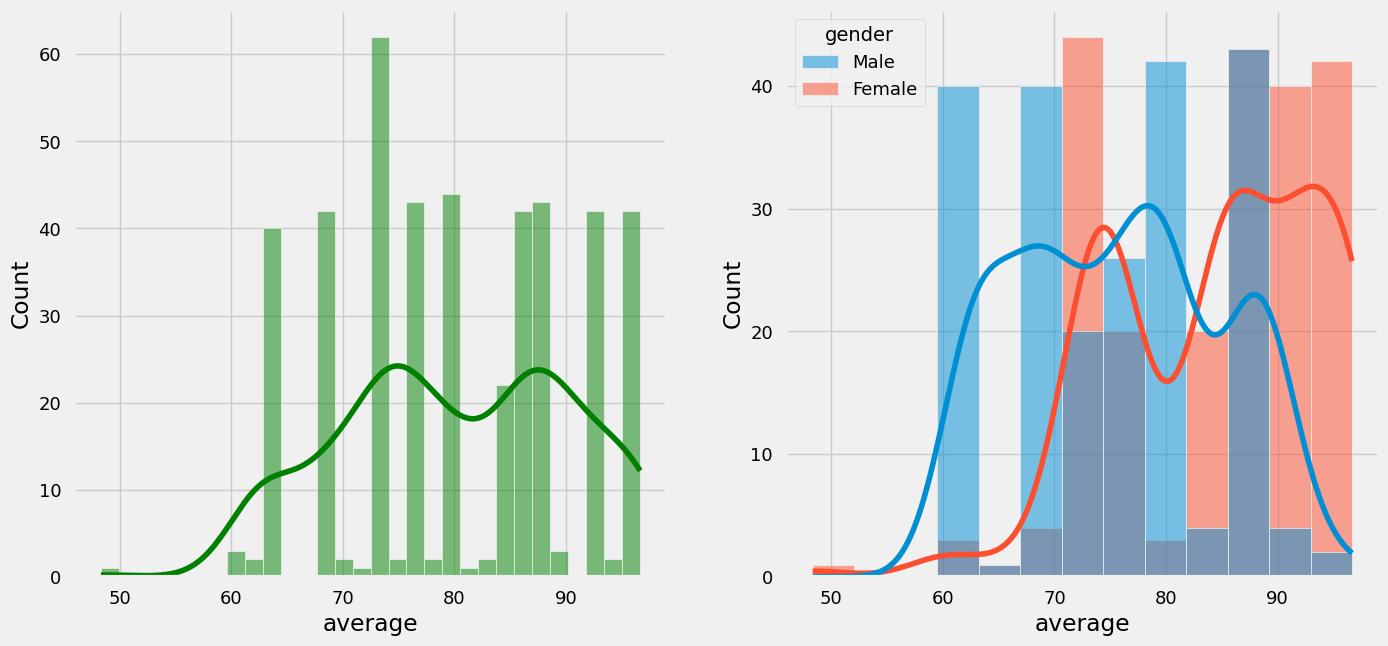

In [211]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='average',kde=True,hue='gender')
plt.show()

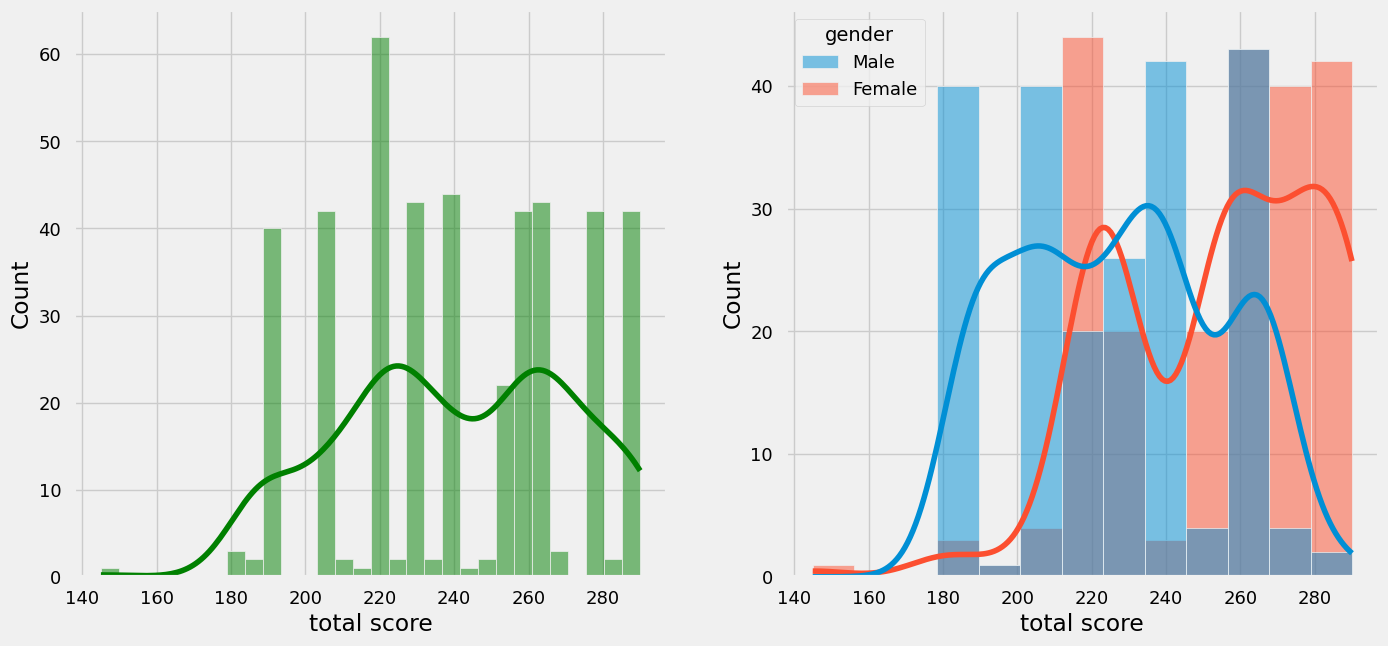

In [212]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

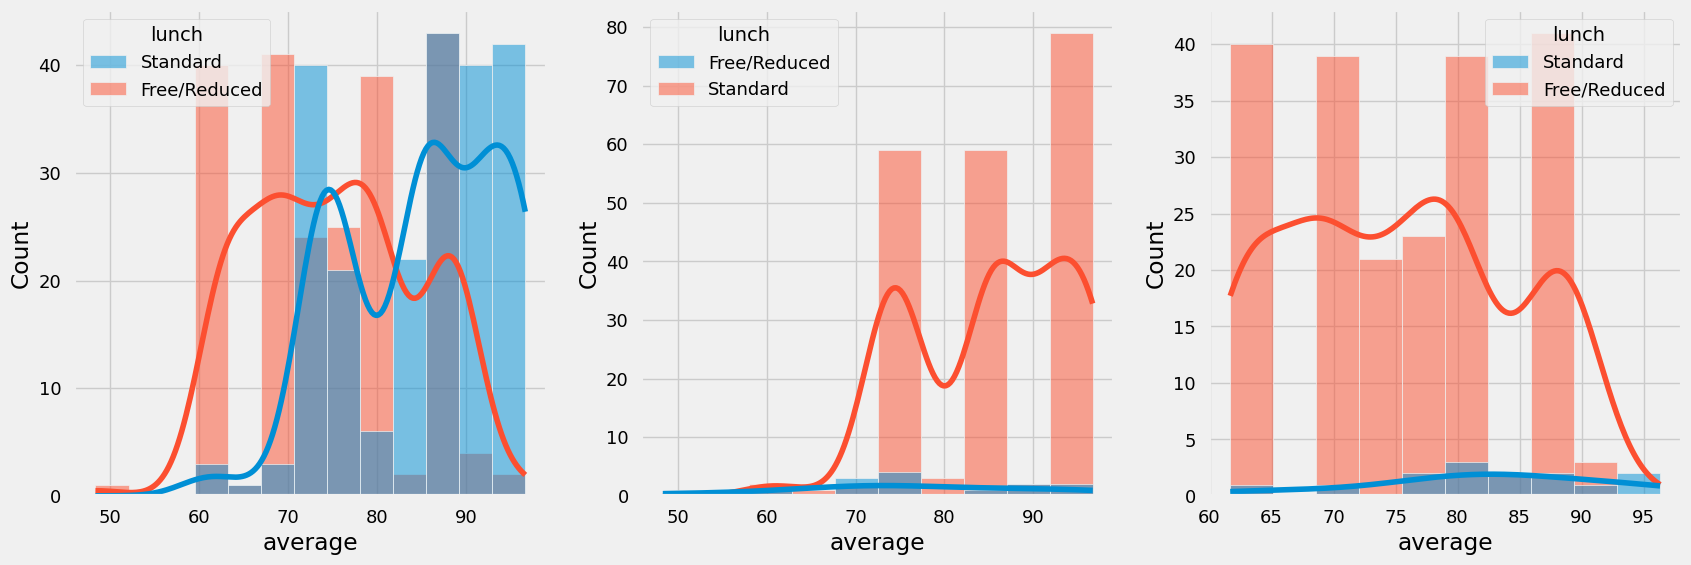

In [213]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df1,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df1[df1.gender=='Female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df1[df1.gender=='Male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

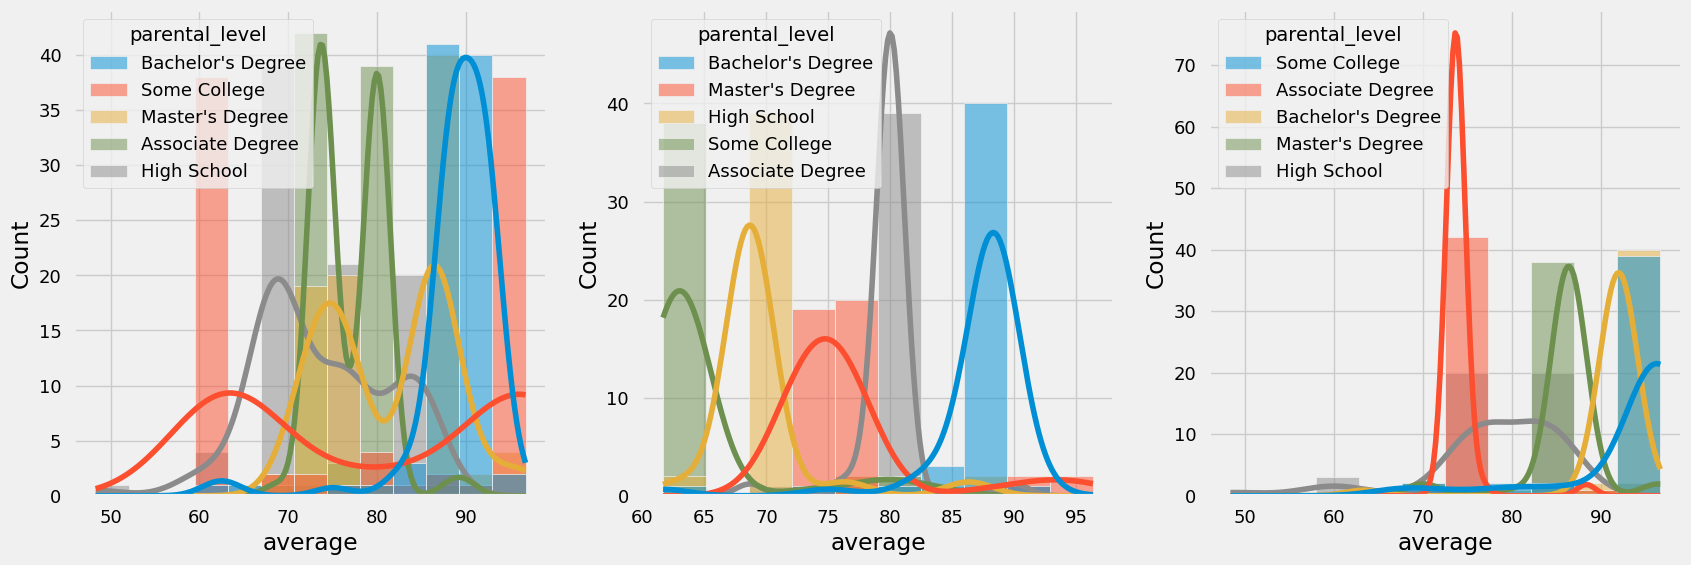

In [214]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df1,x='average',kde=True,hue='parental_level')
plt.subplot(142)
ax =sns.histplot(data=df1[df1.gender=='Male'],x='average',kde=True,hue='parental_level')
plt.subplot(143)
ax =sns.histplot(data=df1[df1.gender=='Female'],x='average',kde=True,hue='parental_level')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

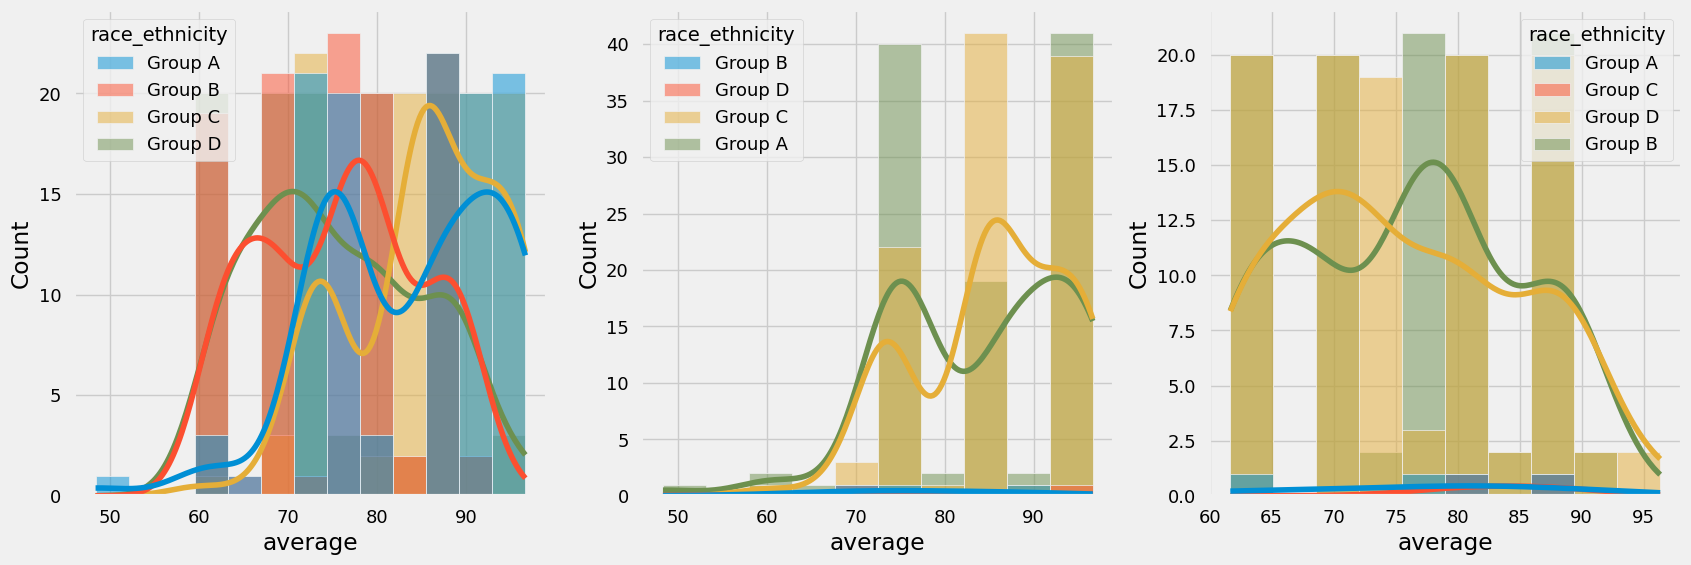

In [215]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df1,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df1[df1.gender=='Female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df1[df1.gender=='Male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

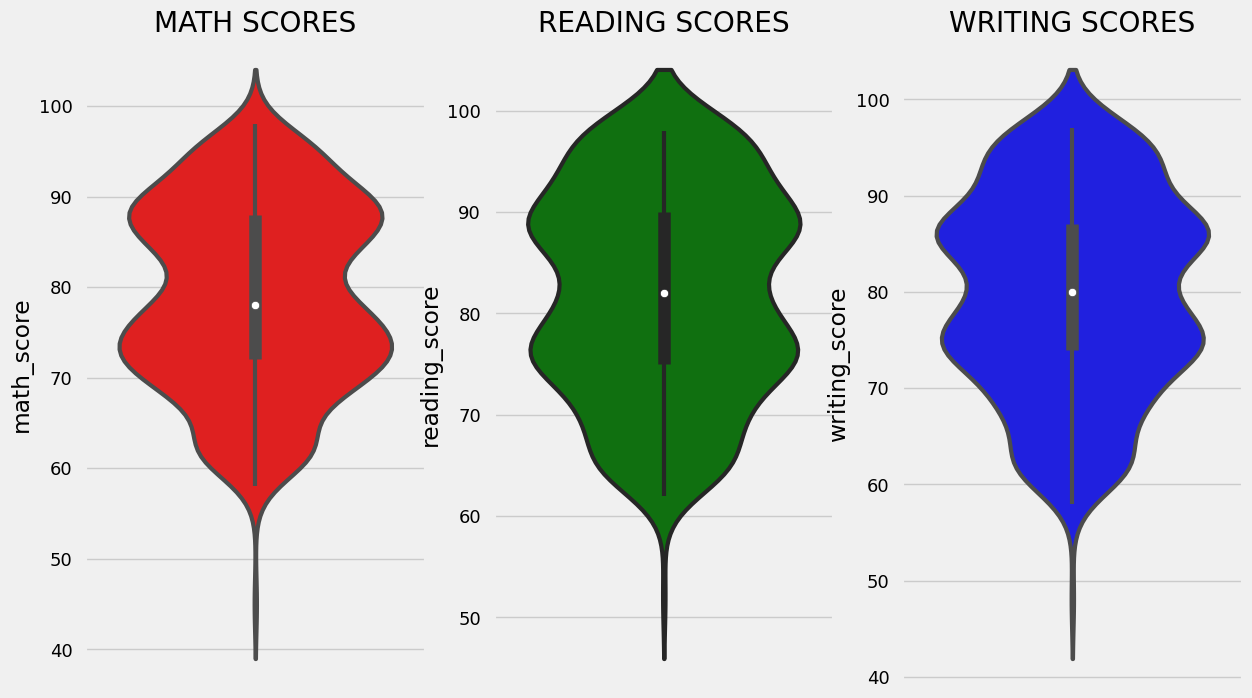

In [217]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df1,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df1,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df1,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

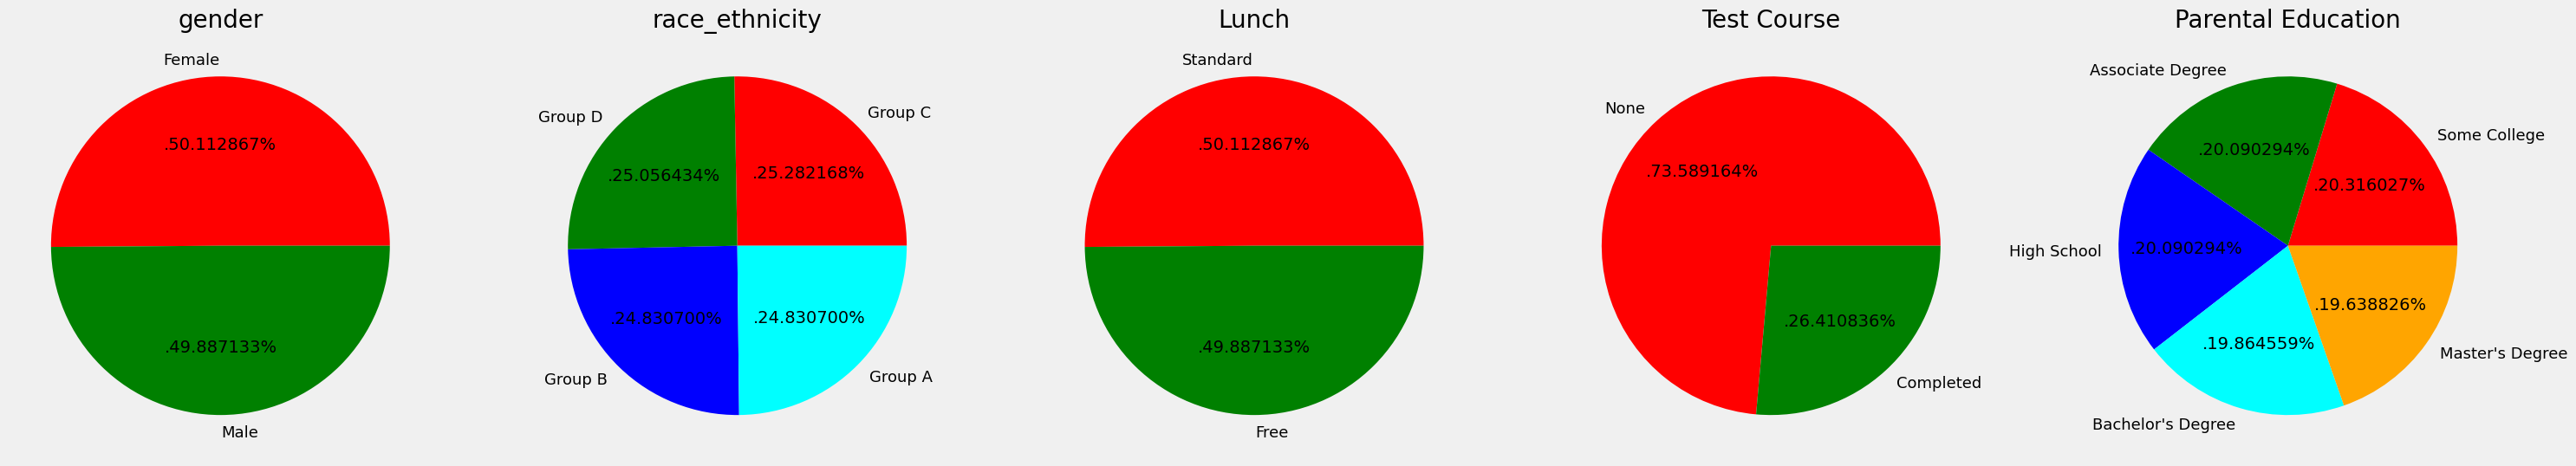

In [218]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df1['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df1['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group A'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df1['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df1['test_preparation'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df1['parental_level'].value_counts()
labels = 'Some College', "Associate Degree",'High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

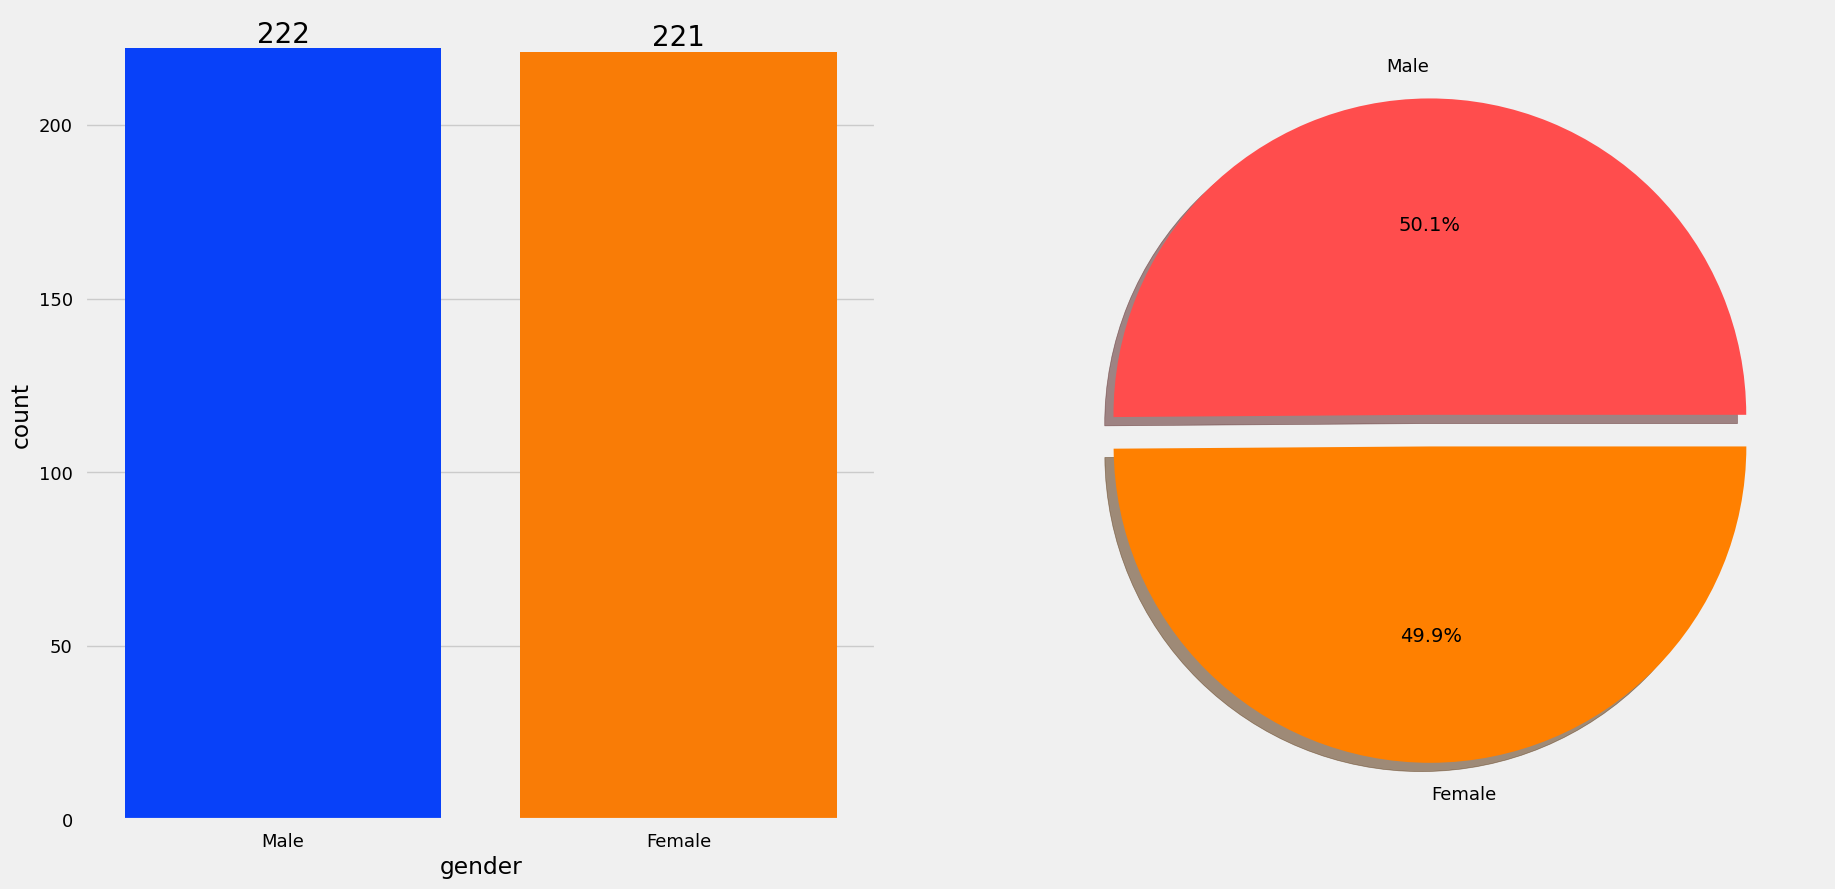

In [219]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df1['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df1['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [220]:
gender_group = df1.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
Female,82.950226,86.330317,84.488688,253.769231,84.589744
Male,74.648649,77.590090,75.094595,227.333333,75.777778


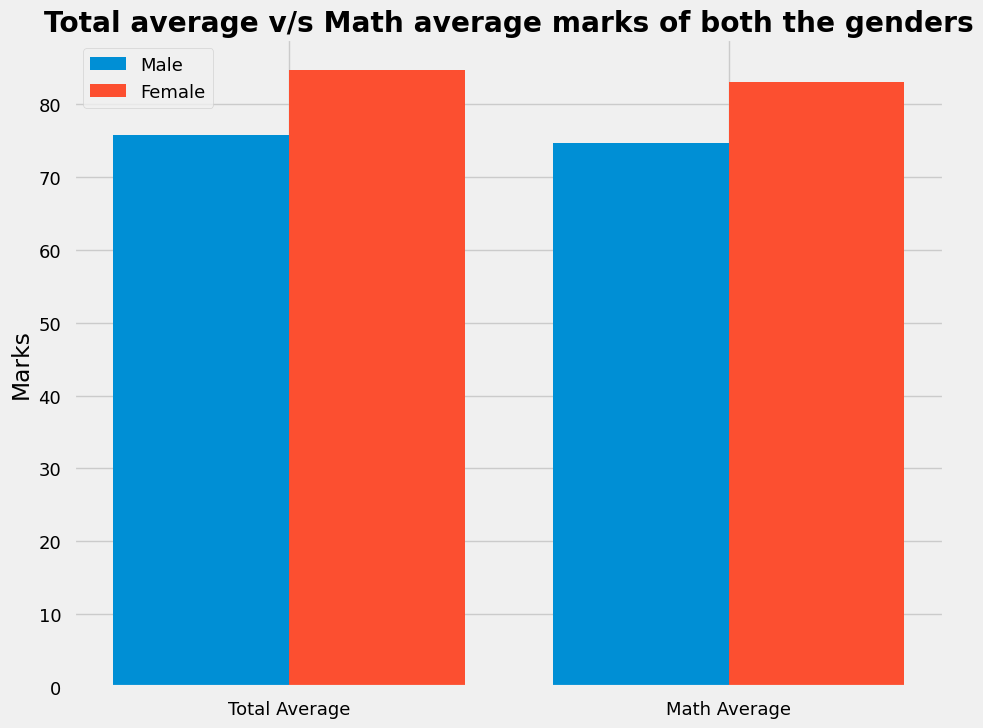

In [221]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

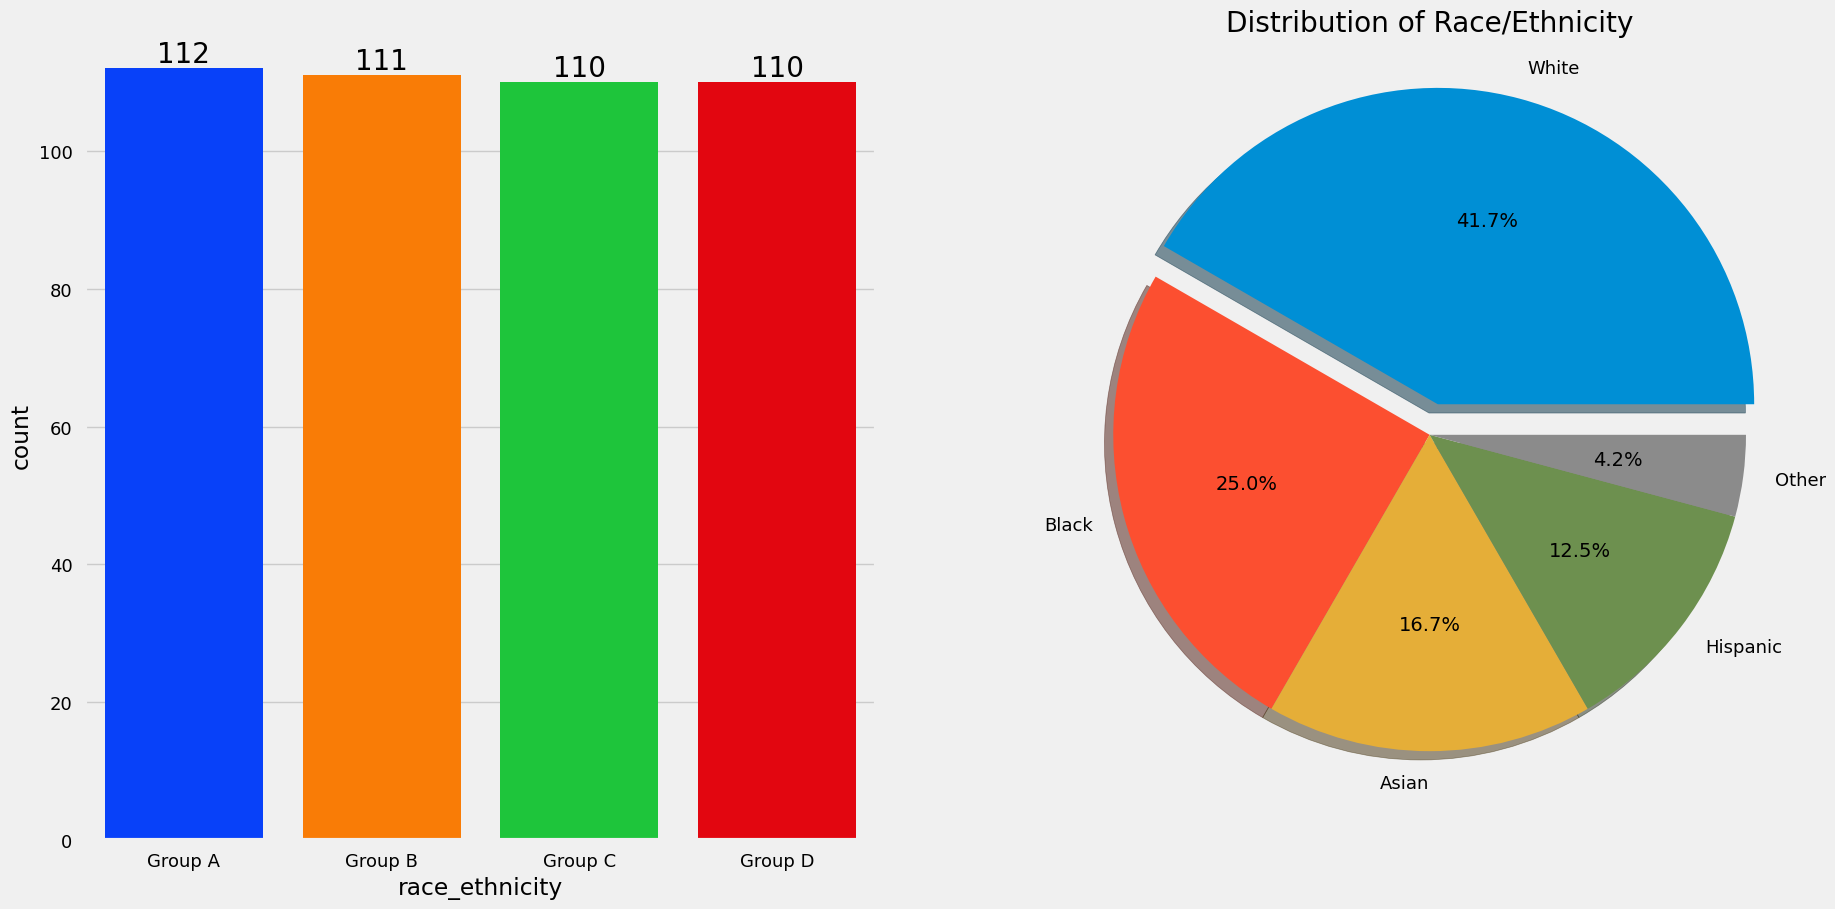

In [222]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df1['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
#plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
#plt.show() 

import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'race_ethnicity': ['White', 'Black', 'Asian', 'Hispanic', 'Other'],
        'count': [500, 300, 200, 150, 50]}
df2 = pd.DataFrame(data)

# Create a pie chart
plt.pie(x=df2['count'], labels=df2['race_ethnicity'], explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Race/Ethnicity')
plt.show()


In [223]:
print(df1.columns)


Index(['gender', 'race_ethnicity', 'parental_level', 'lunch',
       'test_preparation', 'math_score', 'reading_score', 'writing_score',
       'total score', 'average'],
      dtype='object')


#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

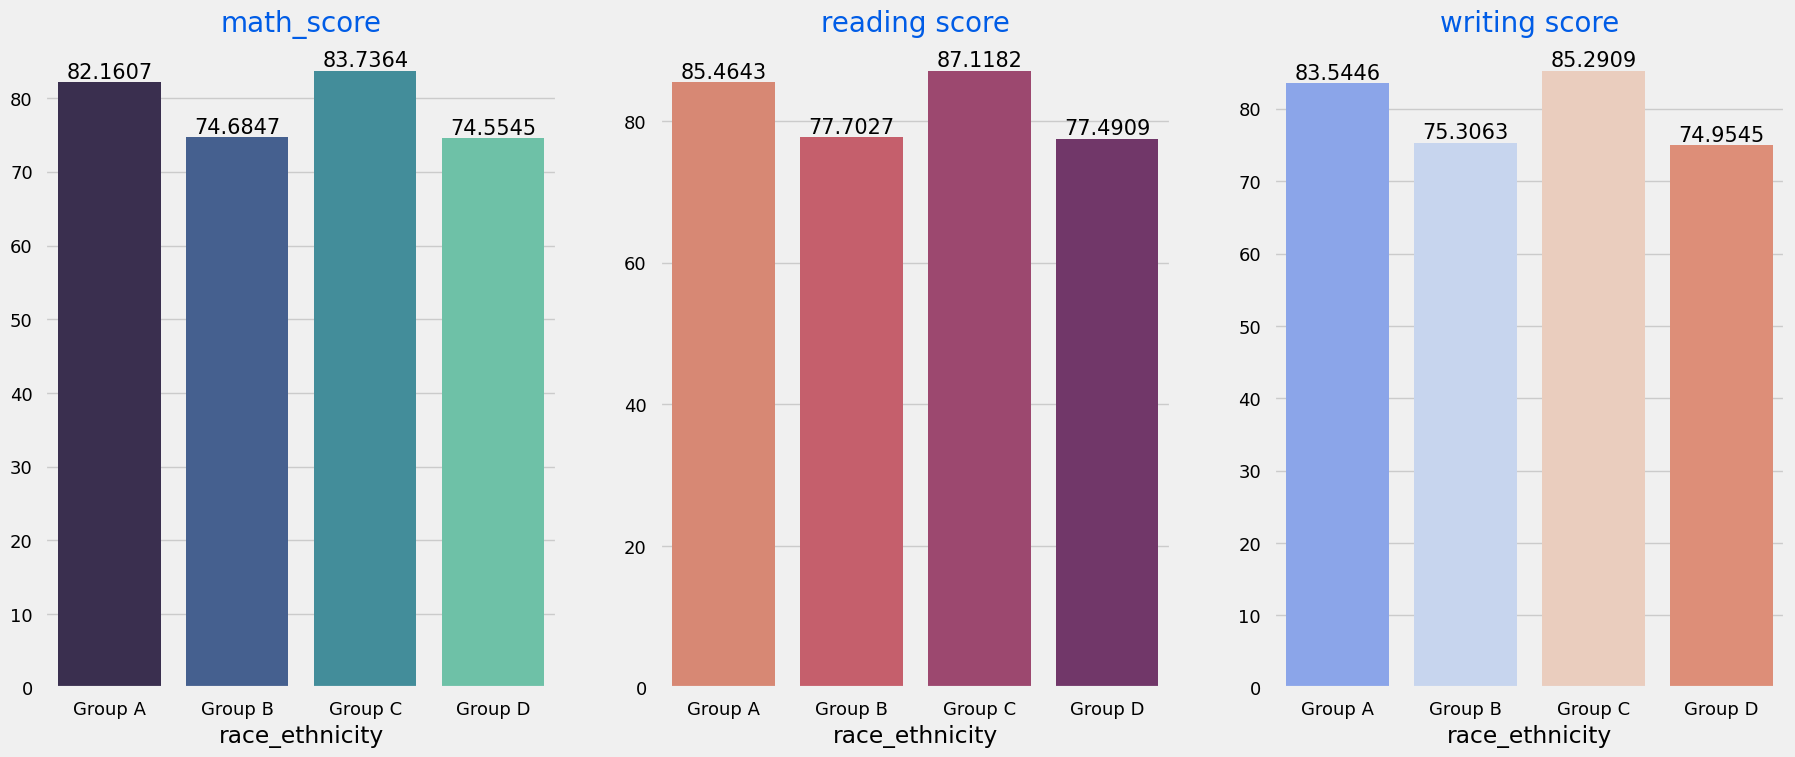

In [224]:
Group_data2=df1.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

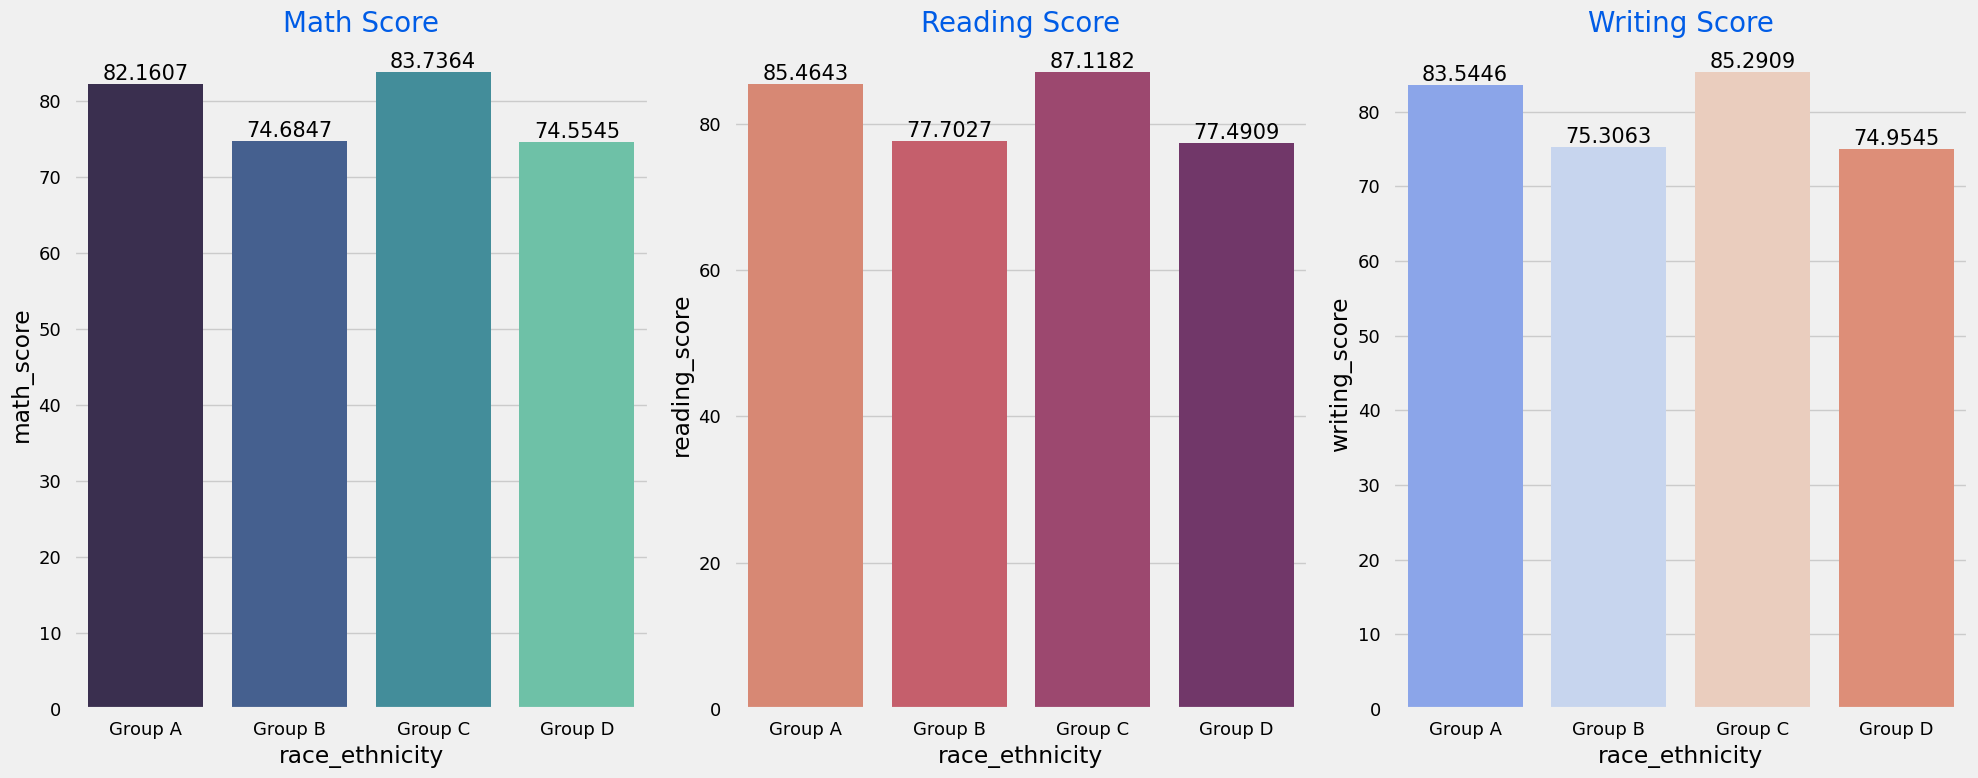

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have created your DataFrame 'df1' here

# Group the data by 'race_ethnicity'
Group_data2 = df1.groupby('race_ethnicity')

# Create subplots for the three score types
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plotting math_score
sns.barplot(x=Group_data2['race_ethnicity'].first(), y=Group_data2['math_score'].mean(), palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plotting reading_score
sns.barplot(x=Group_data2['race_ethnicity'].first(), y=Group_data2['reading_score'].mean(), palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plotting writing_score
sns.barplot(x=Group_data2['race_ethnicity'].first(), y=Group_data2['writing_score'].mean(), palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


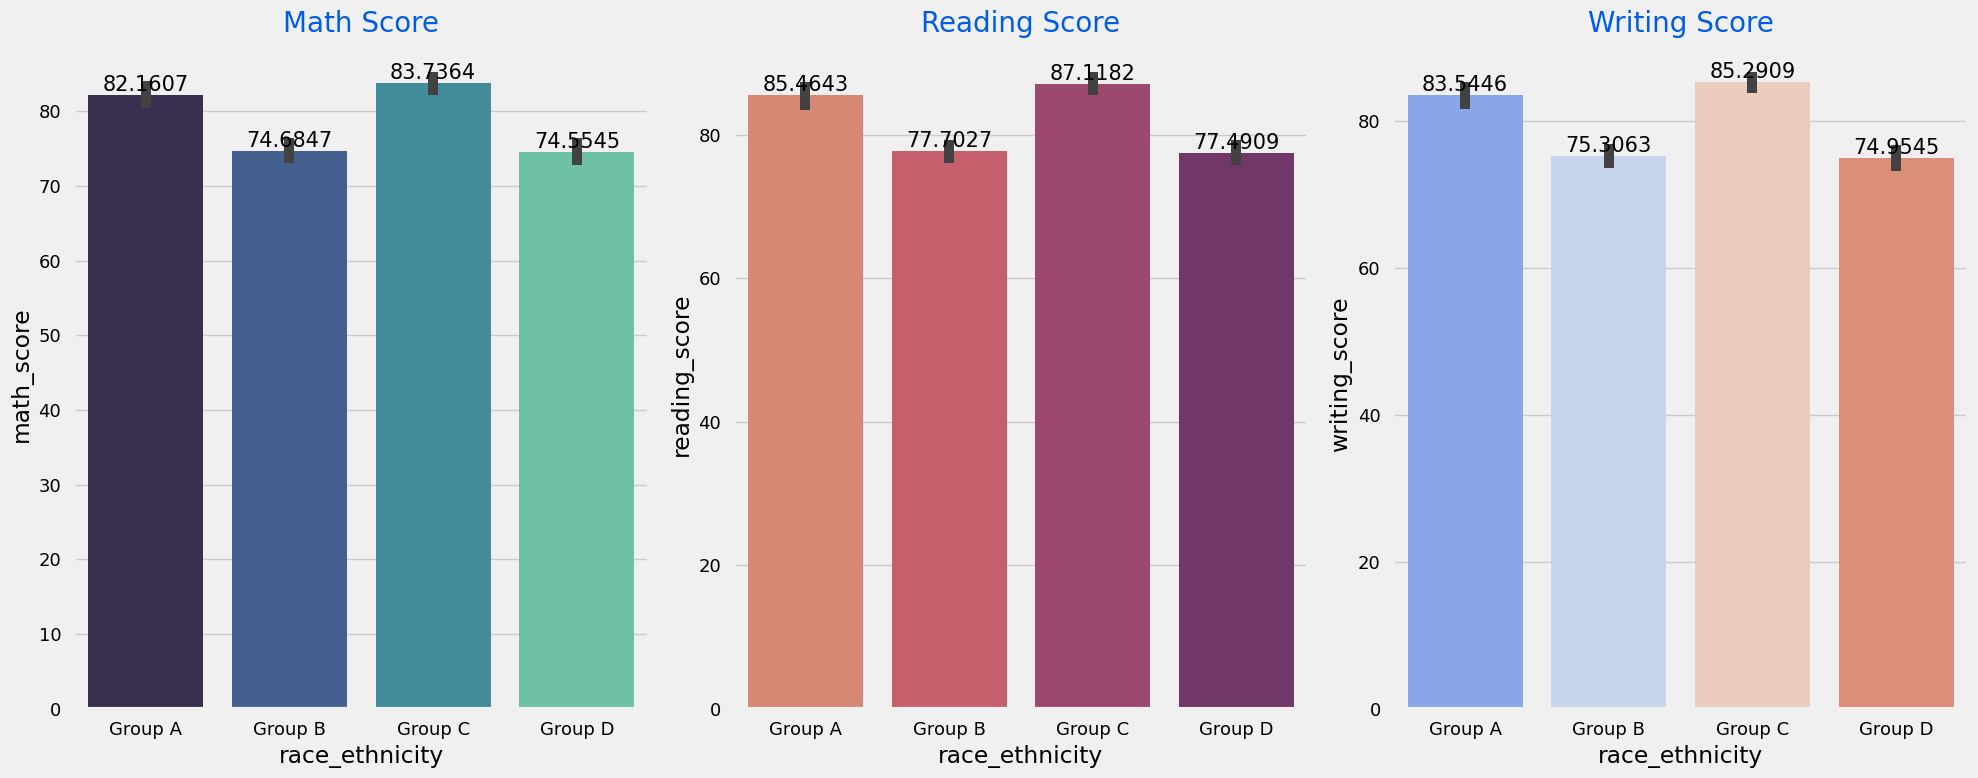

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have created your DataFrame 'df1' here

# Group the data by 'race_ethnicity'
Group_data2 = df1.groupby('race_ethnicity')

# Create subplots for the three score types
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plotting math_score
sns.barplot(x='race_ethnicity', y='math_score', data=df1, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plotting reading_score
sns.barplot(x='race_ethnicity', y='reading_score', data=df1, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plotting writing_score
sns.barplot(x='race_ethnicity', y='writing_score', data=df1, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


In [229]:
print(df1.columns)


Index(['gender', 'race_ethnicity', 'parental_level', 'lunch',
       'test_preparation', 'math_score', 'reading_score', 'writing_score',
       'total score', 'average'],
      dtype='object')


#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [230]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df1['parental_level'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "Bachelor's Degree"

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

#### Insights 
- Largest number of parents are from some college.

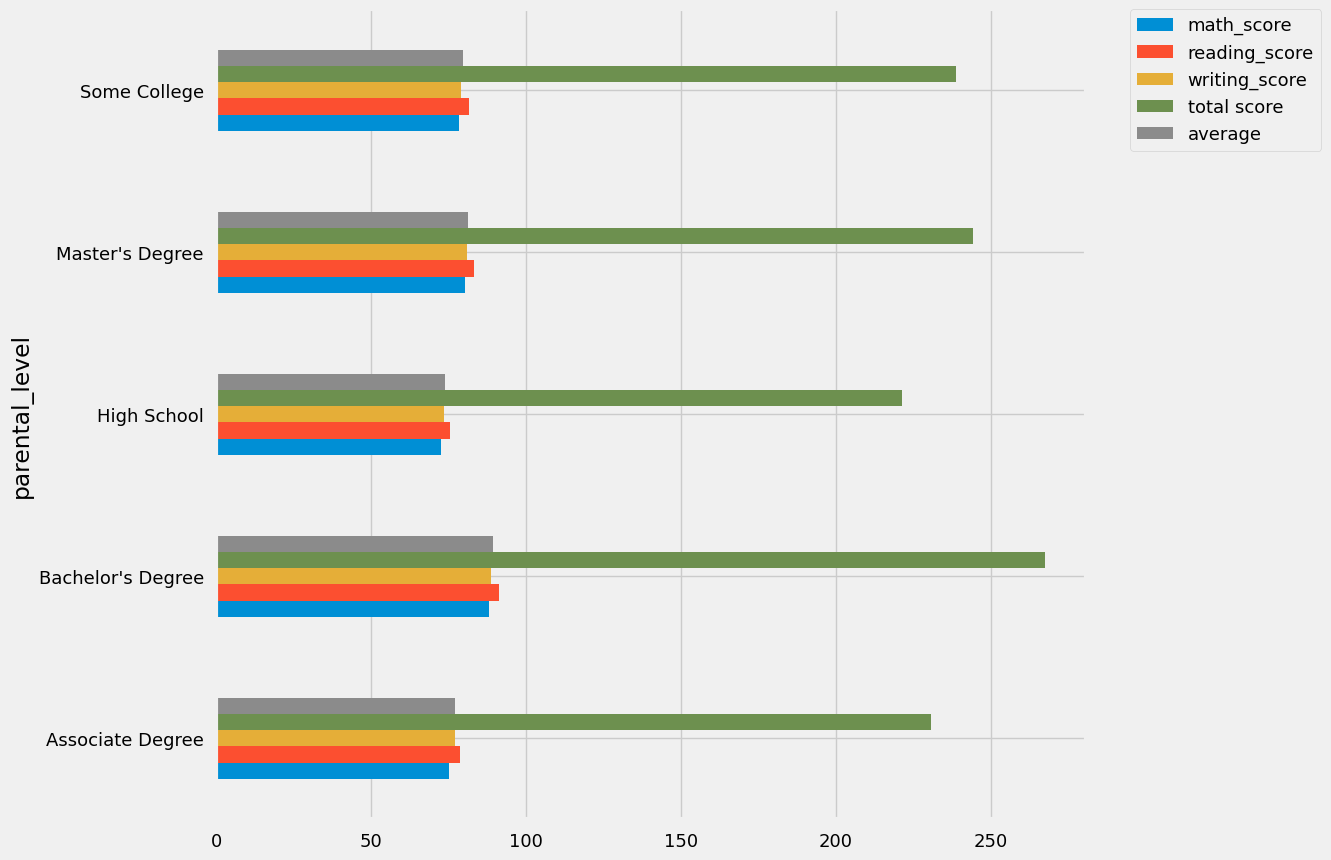

In [231]:
df1.groupby('parental_level').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

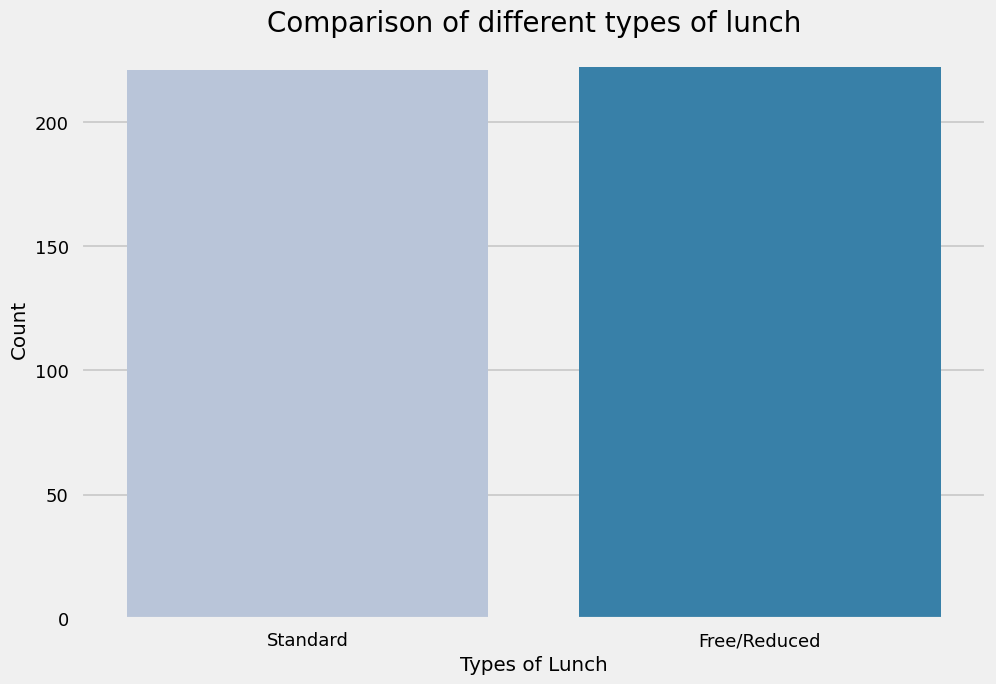

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have created your DataFrame 'df1' here

# Specify the order of lunch categories
lunch_order = ['Standard', 'Free/Reduced']

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

# Use the order parameter to specify the order of categories
sns.countplot(data=df1, x='lunch', palette='PuBu', order=lunch_order)
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot: xlabel='lunch', ylabel='writing_score'>

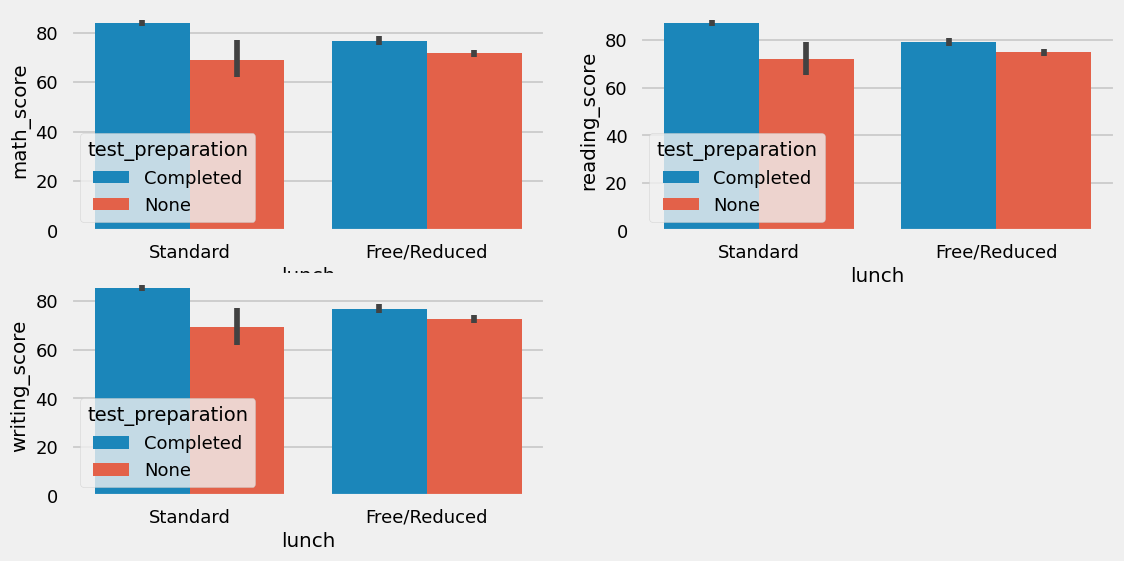

In [234]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df1['lunch'], y=df1['math_score'], hue=df1['test_preparation'])
plt.subplot(2,2,2)
sns.barplot (x=df1['lunch'], y=df1['reading_score'], hue=df1['test_preparation'])
plt.subplot(2,2,3)
sns.barplot (x=df1['lunch'], y=df1['writing_score'], hue=df1['test_preparation'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

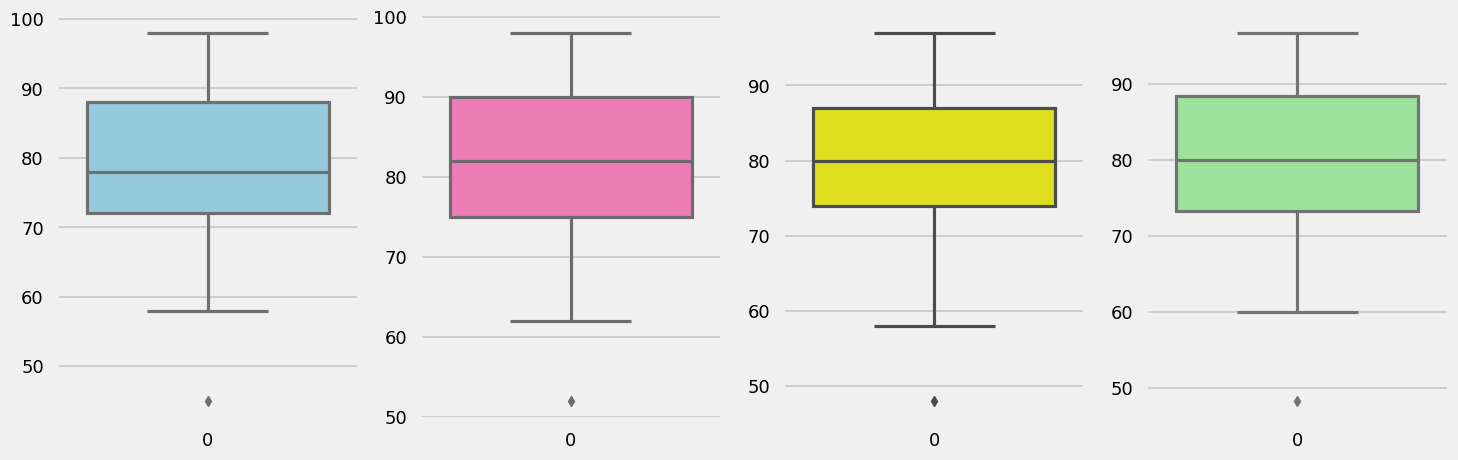

In [236]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df1['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df1['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df1['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df1['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

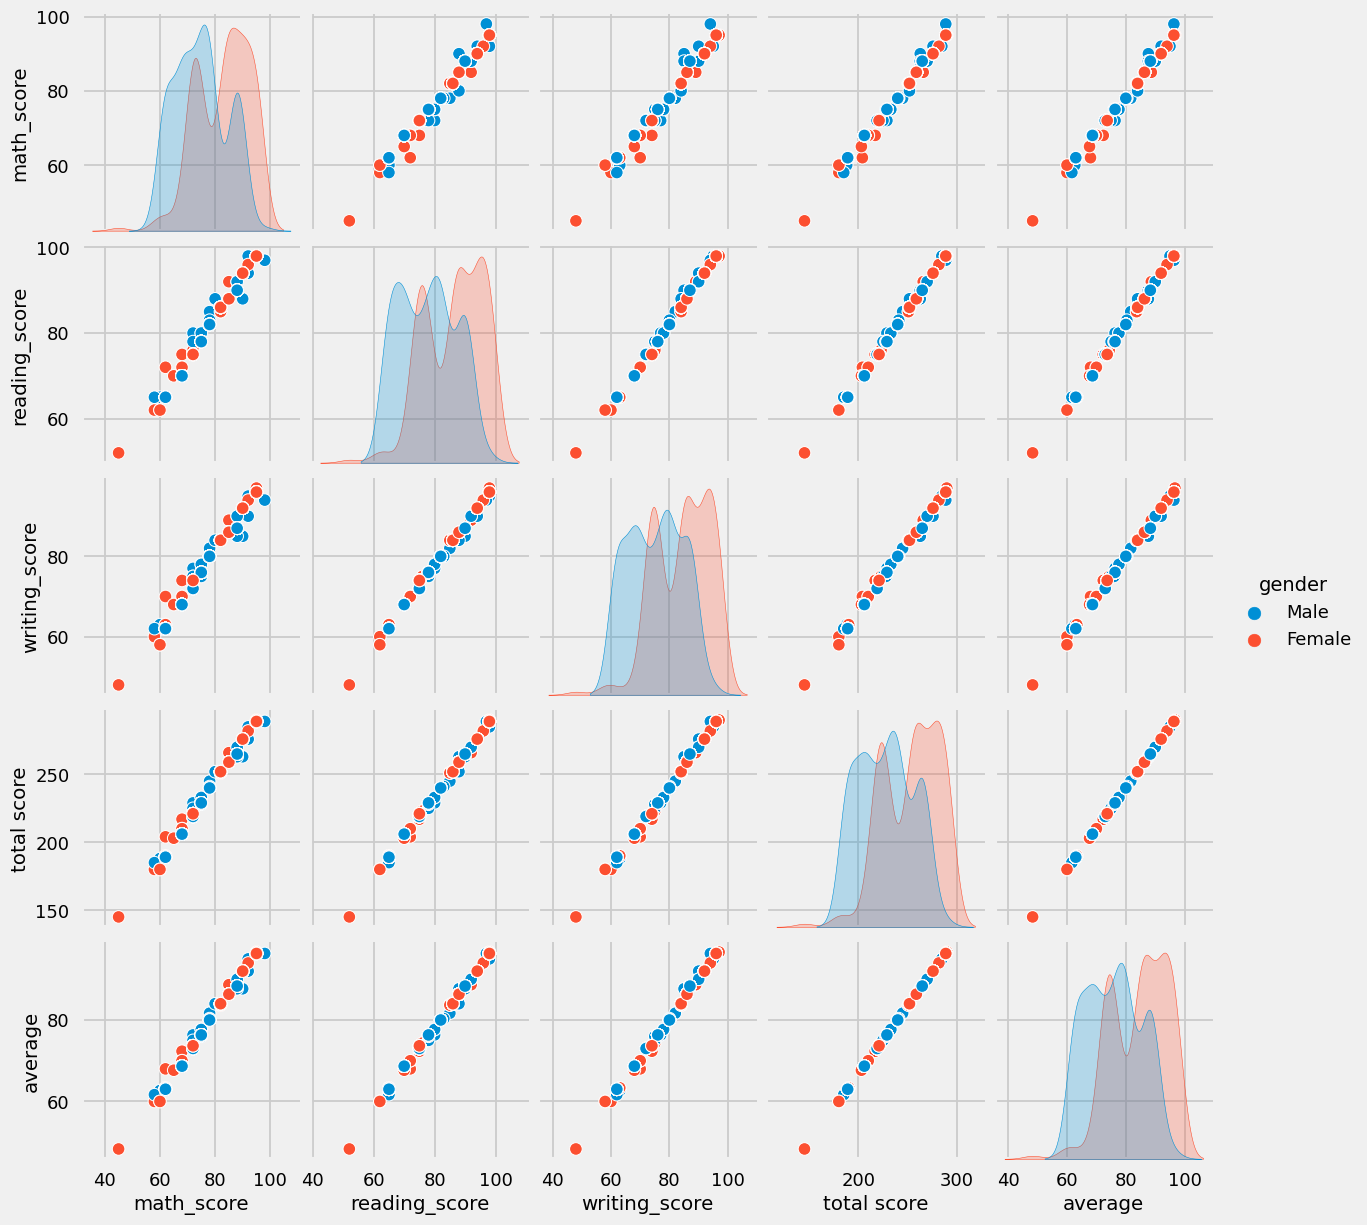

In [237]:
sns.pairplot(df1,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.